In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/environment.py
%pprint
notebook_path = get_notebook_path()
print(notebook_path)
from PIL import Image
import sys
import os
import pylab
import imageio
import numpy as np
from IPython.display import Image

s = Storage()
mp4_dir = os.path.join(s.saves_folder, 'mp4')
gif_dir = os.path.join(s.saves_folder, 'gif')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
dir()

Pretty printing has been turned OFF
C:\Users\dev\Documents\repositories\notebooks\Miscellaneous\ipynb\Speedtest.net Exploration.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'Image', 'In', 'Out', 'RandomForestClassifier', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'csv', 'exit', 'get_classifier', 'get_data_structs_df', 'get_datastructure_prediction', 'get_dir_tree', 'get_importances', 'get_input_sample', 'get_ipython', 'get_module_version', 'get_notebook_path', 'get_struct_name', 'gif_dir', 'imageio', 'ipykernel', 'json', 'jupyter_config_dir', 'mp4_dir', 'notebook_path', 'notebookapp', 'np', 'os', 'pd', 'pickle', 'preprocess_data', 'pylab', 'quit', 're', 's', 'sys', 'urllib']

In [2]:

file_path = os.path.join(s.data_csv_folder, 'speedtest_log.csv')
!"C:\Program Files (x86)\Microsoft Office\root\Office16\EXCEL.EXE" {os.path.abspath(file_path)}

In [3]:

speedtest_log_df = pd.read_csv(file_path)
speedtest_log_df['Timestamp'] = pd.to_datetime(speedtest_log_df['Timestamp'], errors='coerce')
speedtest_log_df.shape

(5377, 10)

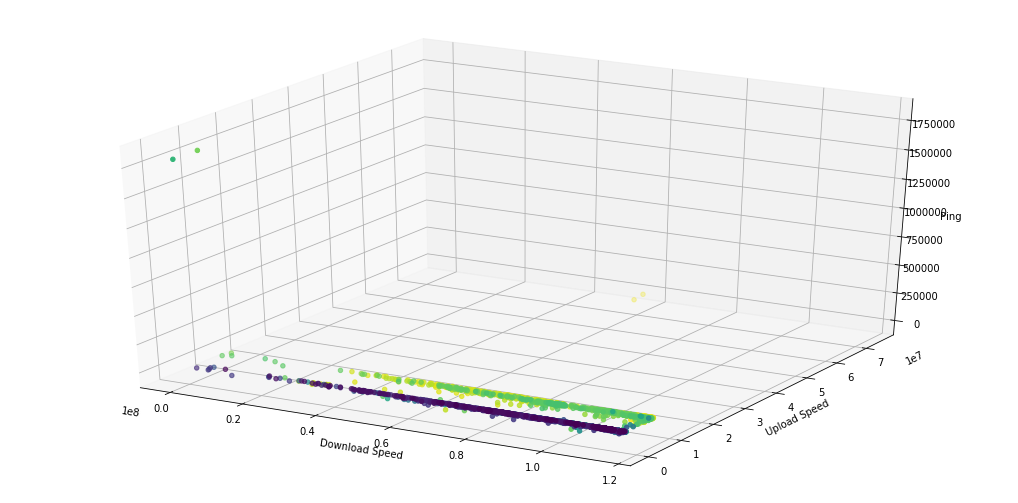

In [4]:

%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

xdata = speedtest_log_df['Download'].values
ydata = speedtest_log_df['Upload'].values
zdata = speedtest_log_df['Ping'].values
tdata = speedtest_log_df['Timestamp'].values

fig = plt.figure(figsize=(18, 9))
ax = plt.axes(projection='3d')

path_3d_collection = ax.scatter3D(xdata, ydata, zdata, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Download Speed')
ylabel_text = plt.ylabel('Upload Speed')
zlabel_text = ax.set_zlabel('Ping')

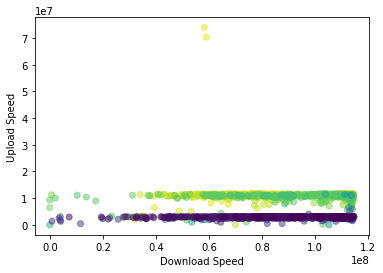

In [5]:

path_collection = plt.scatter(xdata, ydata, alpha=0.5, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Download Speed')
ylabel_text = plt.ylabel('Upload Speed')

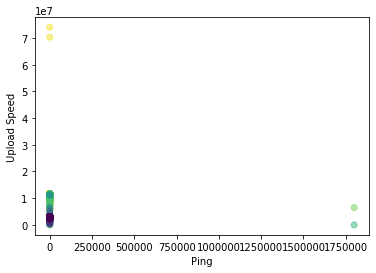

In [6]:

path_collection = plt.scatter(zdata, ydata, alpha=0.5, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Ping')
ylabel_text = plt.ylabel('Upload Speed')

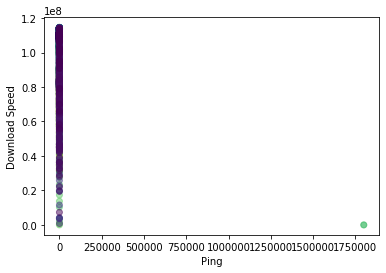

In [7]:

path_collection = plt.scatter(zdata, xdata, alpha=0.5, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Ping')
ylabel_text = plt.ylabel('Download Speed')

In [8]:

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def plot_time_series(x, y, x_label, y_label):
    fig = plt.figure(figsize=(18, 9))
    ax = plt.axes()

    months = mdates.MonthLocator()
    months_format = mdates.DateFormatter('%B')
    days = mdates.DayLocator()
    days_format = mdates.DateFormatter('%m/%d')

    # Format the ticks
    ax.xaxis_date()
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_format)
    
    path_collection = ax.plot_date(x, y)
    xlabel_text = plt.xlabel(x_label)
    ylabel_text = plt.ylabel(y_label)

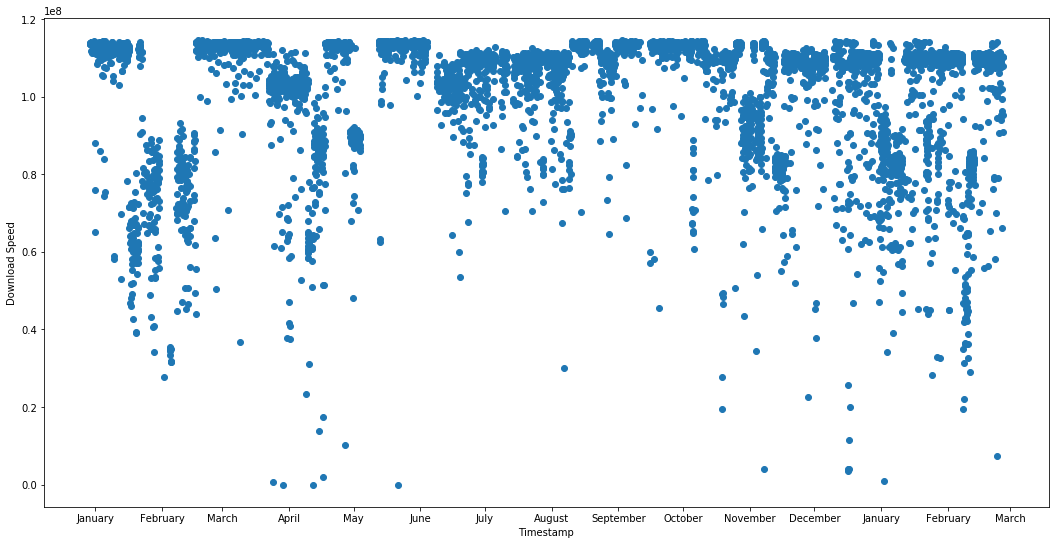

In [9]:

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plot_time_series(tdata, xdata, 'Timestamp', 'Download Speed')

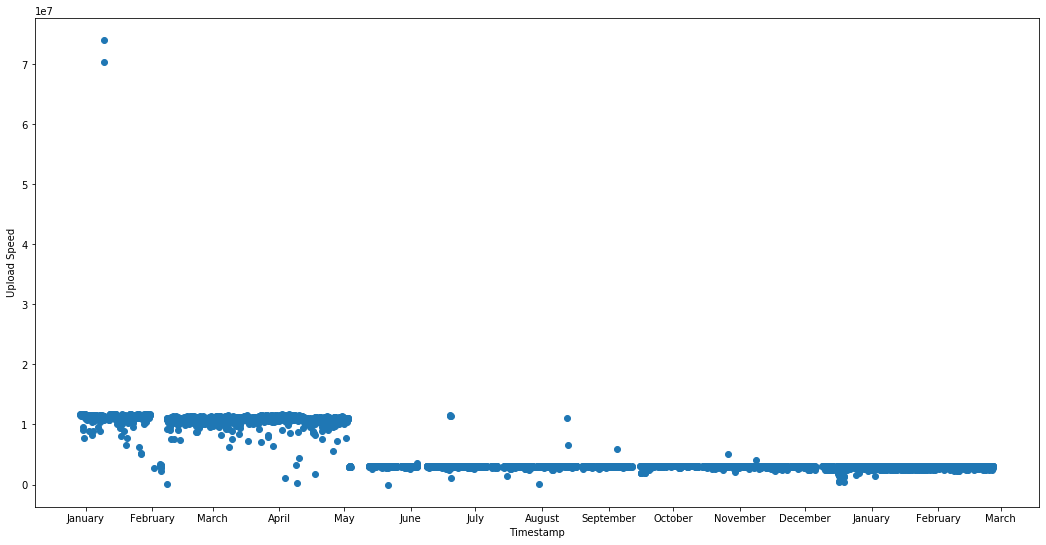

In [10]:

plot_time_series(tdata, ydata, 'Timestamp', 'Upload Speed')

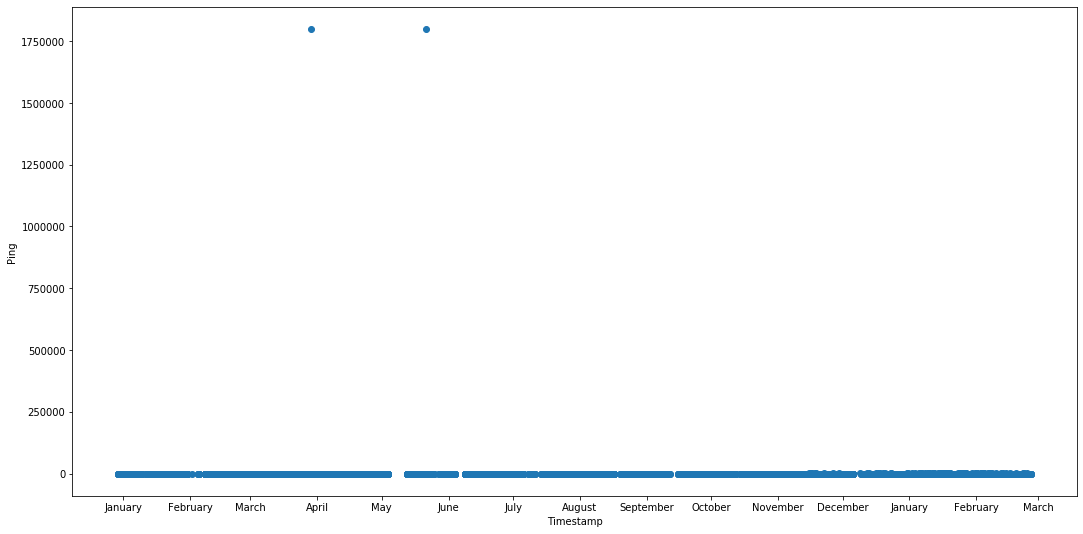

In [11]:

plot_time_series(tdata, zdata, 'Timestamp', 'Ping')

In [12]:

for column_name in ['Server ID', 'Sponsor', 'Server Name', 'Distance', 'IP Address']:
    column_series = speedtest_log_df[column_name]
    print()
    print(column_name)
    print(column_series.value_counts())


Server ID
2405     2496
4920     2285
5960      232
13429     137
1774      114
4981       60
16614      32
29093       6
25323       5
22780       5
5288        4
10170       1
Name: Server ID, dtype: int64

Sponsor
Spectrum                   2496
Norwood Light Broadband    2285
netBlazr                    232
Starry, Inc.                137
Comcast                     114
SELCO                        60
Cox - New England            32
Verizon                       6
Bluespan                      5
iboss                         5
Bluespan Wireless, LLC        4
CenturyLink, Inc              1
Name: Sponsor, dtype: int64

Server Name
Oxford, MA        2496
Norwood, MA       2285
Boston, MA         256
Somerville, MA     232
Shrewsbury, MA      60
Providence, RI      38
Sahuarita, AZ        5
Tucson, AZ           5
Name: Server Name, dtype: int64

Distance
61.546479    1025
59.947274     975
51.011948     876
50.722228     498
60.187778     472
53.749188     409
39.233132     338
60.56